<a href="https://colab.research.google.com/github/agnivachakraborty/Telecom-Churn-Case-Study/blob/main/TelecomChurnCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings

## Reading and understanding the data


In [105]:
## Establish the connection between google drive and colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [106]:
## Read CSV data from the google drive path
df = pd.read_csv('/content/drive/MyDrive/Upgrad/TelecomChurnCaseStudy/train.csv',low_memory=False)
df.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [107]:
df.shape

(69999, 172)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [109]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [110]:
# Segregate Categorcial, ID and Numeric columns for ease of analysis

#Categorcial columns separation : categorical columns are only date here
date_columns = [col for col in df.columns if df[col].dtype =="object"]
print(f"Total Categorical columns:{len(date_columns)}")

#ID columns separation
id_columns = ["mobile_number","circle_id"]  # total ID columns are 2
print(f"Total numeric columns:{len(id_columns)}")

#Numeric columns separation
numeric_columns = [ col for col in df.columns if col not in date_columns + id_columns]
print(f"Total numeric columns:{len(numeric_columns)}")

Total Categorical columns:9
Total numeric columns:2
Total numeric columns:162


In [111]:
#check the date columns
df[date_columns].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


###last_date_of_month_6, last_date_of_month_7, last_date_of_month_8,
The above columns have only one value - That is the last day of correspnding month.Hence we can drop these columns
###date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8
Date of Last recharge of corresponding month also can be dropped, We are not going to derive anything from these dates
###date_of_last_rech_data_6, date_of_last_rech_data_7, date_of_last_rech_data_8
These columns also can be dropped


In [112]:
# Dropping date columns
df = df.drop(date_columns, axis=1)

In [113]:
# when total_rech_data and date_of_last_rech_data is null, Check date_of_last_rech_data,total_rech_data,max_rech_data etc.
df[df["total_rech_data_6"].isna().isna()][ \
    ["total_rech_data_6","max_rech_data_6","max_rech_data_6","av_rech_amt_data_6"]]

,total_rech_data_6,max_rech_data_6,max_rech_data_6,av_rech_amt_data_6


In [114]:
# Columns which we have to impute as Zero.
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]
# Put zero in these columns
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

Below columns are imputed with zeros.

Total Recharge data in month 6,7,8
Maximum Recharge Data in Month 6,7,8
Average Amount recharge Data in Month 6,7,8

## Handling Missing values in columns

In [96]:
# List the columns having more than 30% missing values
df_missing_columns = df.isnull().sum().to_frame(name='null')
df_missing_columns['null_percentage'] = df_missing_columns['null'] / len(df) * 100
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [97]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [98]:
df.shape

(69999, 54)

In [99]:
df.shape

(69999, 54)

In [100]:
# Check again the null values percentages
(df.isnull().sum()/len(df)).sort_values(ascending = False).head(50)

id                    0.0
sachet_2g_6           0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8           0.0
vol_3g_mb_6           0.0
vol_3g_mb_7           0.0
vol_3g_mb_8           0.0
monthly_2g_6          0.0
monthly_2g_7          0.0
monthly_2g_8          0.0
sachet_2g_7           0.0
arpu_6                0.0
sachet_2g_8           0.0
monthly_3g_6          0.0
monthly_3g_7          0.0
monthly_3g_8          0.0
sachet_3g_6           0.0
sachet_3g_7           0.0
sachet_3g_8           0.0
aon                   0.0
aug_vbc_3g            0.0
jul_vbc_3g            0.0
jun_vbc_3g            0.0
av_rech_amt_data_6    0.0
max_rech_data_8       0.0
max_rech_data_7       0.0
max_rech_data_6       0.0
arpu_7                0.0
arpu_8                0.0
total_og_mou_6        0.0
total_og_mou_7        0.0
total_og_mou_8        0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_rech_n

Night pack user columns and FB User columns are categorical column.
"night_pck_user_6"
"night_pck_user_7"
"night_pck_user_8"
"fb_user_6"
"fb_user_7"
"fb_user_8"

In [115]:
# Check night_pck_user unique values in month 6
df["night_pck_user_6"].unique()

array([nan,  0.,  1.])

In [116]:
#Check the percetages null values of these columns
categorical_columns = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6",
"fb_user_7",
"fb_user_8"]

df[categorical_columns].isna().sum()/len(df)

night_pck_user_6    0.749025
night_pck_user_7    0.744782
night_pck_user_8    0.736896
fb_user_6           0.749025
fb_user_7           0.744782
fb_user_8           0.736896
dtype: float64

### In the above columns,We can impute the NaN as -1, as a part to mark as missing value.

In [117]:
#Fill NaN value as -1 to mark missing value
df[categorical_columns] = df[categorical_columns].fillna(-1)

In [118]:
# Check if the null value is filled with -1
df[categorical_columns].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
dtype: int64

Hence there are no null values in night_pck_user and fb_user columns in month 6,7,8.

In [119]:
#Check the null value pecentage
(df.isna().sum()/len(df)).sort_values(ascending=False)

arpu_3g_6             0.749025
count_rech_3g_6       0.749025
count_rech_2g_6       0.749025
arpu_2g_6             0.749025
count_rech_3g_7       0.744782
                        ...   
max_rech_data_7       0.000000
max_rech_data_8       0.000000
av_rech_amt_data_6    0.000000
av_rech_amt_data_7    0.000000
churn_probability     0.000000
Length: 163, dtype: float64

In [120]:
# Many columns have more than 70% null values
#Function to drop columns where there are more than 50% null values
def columns_tobe_dropped(cols):
    '''cols: list of columns in dataframe
      '''
    for col in cols:
        if (df[col].isna().sum()/len(df)) > .50:   # Check the condition if null values GT .50
            df.drop(columns=[col],inplace=True)

In [121]:
# drop colums
columns_tobe_dropped(df.columns)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 151 entries, id to churn_probability
dtypes: float64(123), int64(28)
memory usage: 80.6 MB


In [123]:
# check the null value row wise.
df.isna().sum(axis=1).sort_values(ascending = False).head(30)

16787    90
63530    90
17858    90
63613    90
3103     90
34070    90
63592    90
58437    90
41964    90
56259    90
20537    90
67212    90
12726    90
48007    90
44553    90
42012    90
36994    90
15066    90
20543    90
34107    90
24144    90
60497    90
53707    90
7137     90
26054    90
20552    90
10431    90
20555    90
7170     90
63478    90
dtype: int64

We have many rows having multiple null values. We are not dropping these and will fill these gradually

In [124]:
#check columns which have only 1 value.

# Create a DataFrame of no of unique  values and filter where only one value is available.
zero_variance_columns = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(zero_variance_columns[zero_variance_columns['nunique'] == 1])

             feature  nunique
1          circle_id        1
2     loc_og_t2o_mou        1
3     std_og_t2o_mou        1
4     loc_ic_t2o_mou        1
44  std_og_t2c_mou_6        1
45  std_og_t2c_mou_7        1
46  std_og_t2c_mou_8        1
83  std_ic_t2o_mou_6        1
84  std_ic_t2o_mou_7        1
85  std_ic_t2o_mou_8        1


The above columns have just one Unique value.
Hence they have zero variance and can be dropped.

In [125]:
# create columns list whihc have zero variance i:e 1 unique value.
columns_tobe_dropped = list(zero_variance_columns[zero_variance_columns['nunique'] == 1]["feature"])
columns_tobe_dropped

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [126]:
# drop columns whish are having 1 unique values
df.drop(columns=columns_tobe_dropped,inplace=True)

In [127]:
#check the shape
df.shape

(69999, 141)

In [128]:
# Check the null values again
(df.isna().sum()/len(df)).sort_values(ascending=False).reset_index()

,index,0
0,loc_ic_mou_8,0.052901
1,std_ic_t2t_mou_8,0.052901
2,isd_og_mou_8,0.052901
3,std_og_t2m_mou_8,0.052901
4,spl_og_mou_8,0.052901
...,...,...
136,total_rech_data_8,0.000000
137,max_rech_data_6,0.000000
138,max_rech_data_7,0.000000
139,max_rech_data_8,0.000000


Majority of the null values are in Minitue of Usage columns
As these values are not available, so we are imputing those values as 0 instead of iteratively imputing.

In [129]:
# Fill hr NaN as zero.
df = df.fillna(0)

In [130]:
df.isna().sum()

id                   0
arpu_6               0
arpu_7               0
arpu_8               0
onnet_mou_6          0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 141, dtype: int64

## Filter high-value customers
We need to predict churn only for the high-value customers.
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

- Create derive columns to filter high value customer

In [131]:
#Calculate total Data recharge amount--> Total Data Recharge * Average Amount of Data recharge
df["total_data_recharge_amnt_6"] = df.total_rech_data_6 * df.av_rech_amt_data_6
df["total_data_recharge_amnt_7"] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [132]:
#Calculate Total Amount recharge --> total talktime recharge + total data recharge
df["total_recharge_amnt_6"] = df.total_rech_amt_6 + df.total_data_recharge_amnt_6
df["total_recharge_amnt_7"] = df.total_rech_amt_7 + df.total_data_recharge_amnt_7

In [133]:
#Calculate Average amount of recharge of 6th and 7th month
df['average_amnt_6_7'] = (df["total_recharge_amnt_6"] + df["total_recharge_amnt_7"])/2

In [134]:
# Check the 70th percentile of "average_amnt_6_7"
df['average_amnt_6_7'].quantile(.70)

477.5

70th percentile of average amount recharge in 6th and 7th month comes as 477.5.
Now we need to filter the data based on this value.

In [135]:
#filter based on 70th percentile .
df_highvalue = df[df["average_amnt_6_7"]>= df["average_amnt_6_7"].quantile(.70)]

In [136]:
#Delete the derived columns created in above step
df_highvalue.drop(columns=["total_data_recharge_amnt_6","total_data_recharge_amnt_7","total_recharge_amnt_6",\
                                "total_recharge_amnt_7","average_amnt_6_7"],inplace=True)

<ipython-input-136-961cbd832b6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highvalue.drop(columns=["total_data_recharge_amnt_6","total_data_recharge_amnt_7","total_recharge_amnt_6",\


In [137]:
df_highvalue.shape

(21013, 141)

In [138]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_recharge_amnt_6,total_data_recharge_amnt_7,total_recharge_amnt_6,total_recharge_amnt_7,average_amnt_6_7
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,1958,0.0,0.0,0.0,0,0.0,0.0,77.0,65.0,71.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,710,0.0,0.0,0.0,0,0.0,145.0,0.0,290.0,145.0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,882,0.0,0.0,0.0,0,0.0,0.0,70.0,120.0,95.0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,982,0.0,0.0,0.0,0,0.0,0.0,160.0,240.0,200.0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,647,0.0,0.0,0.0,0,1225.0,1337.0,1515.0,1473.0,1494.0


Tag churners and remove attributes of the churn phase
Now we need to tag the churned customers (churn=1, else 0) based on the third month as follows:

-Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

- Based on these below attributes we need to decide churners

total_ic_mou_8
total_og_mou_8
vol_2g_mb_8
vol_3g_mb_8

In [139]:
#Calculate total call in mins by adding Incoming and Outgoing calls
df_highvalue['total_calls_8'] = df_highvalue.total_ic_mou_8 + df_highvalue.total_og_mou_8

<ipython-input-139-2c0a29a064f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highvalue['total_calls_8'] = df_highvalue.total_ic_mou_8 + df_highvalue.total_og_mou_8


In [140]:
# Calculate total 2G and 3G consumption of data
df_highvalue["total_data_consumptions"] = df_highvalue.vol_2g_mb_8 + df_highvalue.vol_3g_mb_8

<ipython-input-140-4de6a8c89a3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highvalue["total_data_consumptions"] = df_highvalue.vol_2g_mb_8 + df_highvalue.vol_3g_mb_8


Now we need to create Churn variable.
Customer who have not used any calls or have not consumed any data on month of 8 are tagged as Churn customer.
Churn customer is marked as 1
non-churn custoner is marked as 0

In [141]:
#Tag 1 as churner  where total_calls_9=0 and total_data_consumptions=0
# else 0 as non-churner
df_highvalue["churn"]=df_highvalue.apply(lambda row:1 if (row.total_calls_8==0 and row.total_data_consumptions==0) else 0,axis=1)

<ipython-input-141-71053ed67539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highvalue["churn"]=df_highvalue.apply(lambda row:1 if (row.total_calls_8==0 and row.total_data_consumptions==0) else 0,axis=1)


In [142]:
#check the percentages of churn and non churn data
df_highvalue["churn"].value_counts(normalize=True)

churn
0    0.9467
1    0.0533
Name: proportion, dtype: float64

The data is imbalance.
Churn percentage is close 5 and non-churn percentage is close to 95.

In [143]:
#Drop the derived columns
df_highvalue.drop(columns=["total_calls_8","total_data_consumptions"],inplace=True)

<ipython-input-143-779f30daf050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highvalue.drop(columns=["total_calls_8","total_data_consumptions"],inplace=True)


Delete columns belong to the 8th month :Churn Month
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _8’, etc. in their names.

These columns contain data for users, where these users are already churned.

Hence those will not contribute anything to churn prediction.

In [144]:
# drop all 8th month columns
df_highvalue = df_highvalue.filter(regex='[^8]$',axis=1)

In [145]:
# check the baisc info about high value customer
df_highvalue.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 21013 entries, 4 to 69997
Data columns (total 97 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21013 non-null  int64  
 1   arpu_6              21013 non-null  float64
 2   arpu_7              21013 non-null  float64
 3   onnet_mou_6         21013 non-null  float64
 4   onnet_mou_7         21013 non-null  float64
 5   offnet_mou_6        21013 non-null  float64
 6   offnet_mou_7        21013 non-null  float64
 7   roam_ic_mou_6       21013 non-null  float64
 8   roam_ic_mou_7       21013 non-null  float64
 9   roam_og_mou_6       21013 non-null  float64
 10  roam_og_mou_7       21013 non-null  float64
 11  loc_og_t2t_mou_6    21013 non-null  float64
 12  loc_og_t2t_mou_7    21013 non-null  float64
 13  loc_og_t2m_mou_6    21013 non-null  float64
 14  loc_og_t2m_mou_7    21013 non-null  float64
 15  loc_og_t2f_mou_6    21013 non-null  float64
 16  loc_og_t2

Finally we have 21,013 rows of records and 96 columns are available to explore.

## Exploratory Data Analysis

In [146]:
# Check the percenatges of churn and non-churn customers
df_highvalue["churn"].value_counts(normalize=True)

churn
0    0.9467
1    0.0533
Name: proportion, dtype: float64

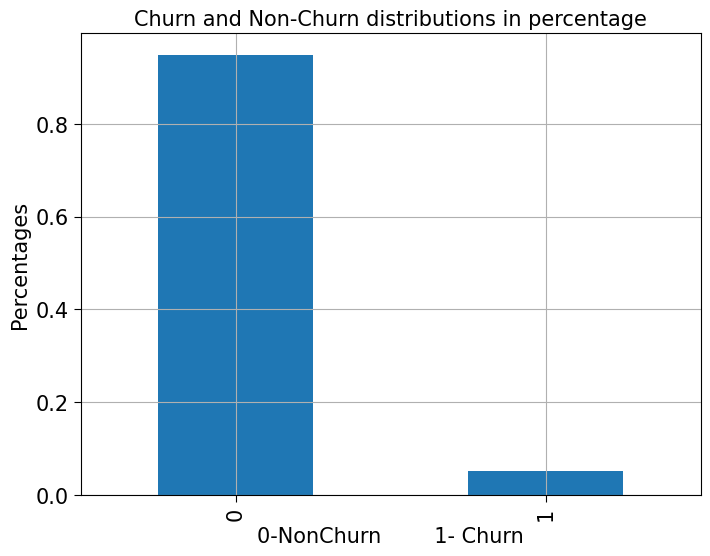

In [147]:
# plot to Check percetanges of churn and non churn data
plt.figure(figsize=(8,6))
df_highvalue["churn"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=5,labelsize = 15)
plt.title("Churn and Non-Churn distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=15)
plt.xlabel("0-NonChurn        1- Churn",fontsize=15)
plt.grid(0.3)
plt.show()

In [148]:
# check basic statistics
df_highvalue.describe()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn
count,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,...,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,34994.28687,558.458938,558.729577,262.552360,267.952181,376.309086,377.793879,16.084861,12.821732,27.284505,...,0.210965,0.231523,0.072622,0.090991,1210.525627,168.380424,176.041281,158.458135,0.082758,0.053300
std,20144.16597,474.147345,494.844437,464.501168,486.113740,481.398575,491.895383,77.460567,77.727877,119.955827,...,0.995942,1.102682,0.977307,0.973815,954.831812,422.862302,438.726943,423.015769,0.275523,0.224637
min,4.00000,-2258.709000,-1289.715000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17599.00000,307.718000,308.673000,16.990000,15.810000,72.030000,69.830000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,461.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34977.00000,482.616000,479.725000,84.860000,82.310000,224.080000,219.430000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,854.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52332.00000,700.552000,697.076000,289.360000,288.730000,492.910000,496.810000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1758.000000,129.160000,132.030000,95.340000,0.000000,0.000000
max,69997.00000,27731.088000,35145.834000,7376.710000,8157.780000,8362.360000,7043.980000,2613.310000,3813.290000,3775.110000,...,29.000000,33.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,1.000000,1.000000


In [149]:
#check columns associated with month 6, From month 6 we can figure out how the columns and data are in other months
cols = [col for col in df_highvalue.columns if "_6" in col]
cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

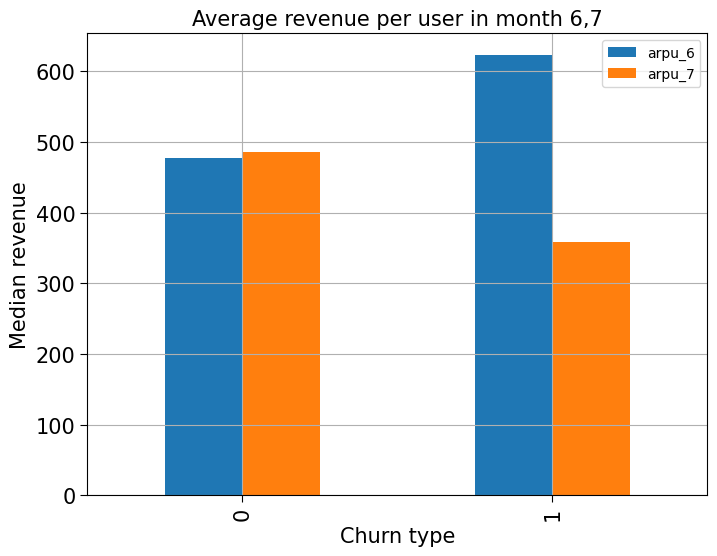

In [150]:
# Plot to visualize average revenue per user(ARPU)
df_highvalue.groupby("churn")[["arpu_6", "arpu_7"]].median().plot.bar(figsize=[8, 6])
plt.title("Average revenue per user in month 6,7", fontsize=15)
plt.tick_params(size=5, labelsize=15)
plt.ylabel("Median revenue", fontsize=15)
plt.xlabel("Churn type", fontsize=15)
plt.grid(0.3)
plt.show()

- Average revenue per user more in month 6 means, if they are unsatisfied, those useres are more likely to churn


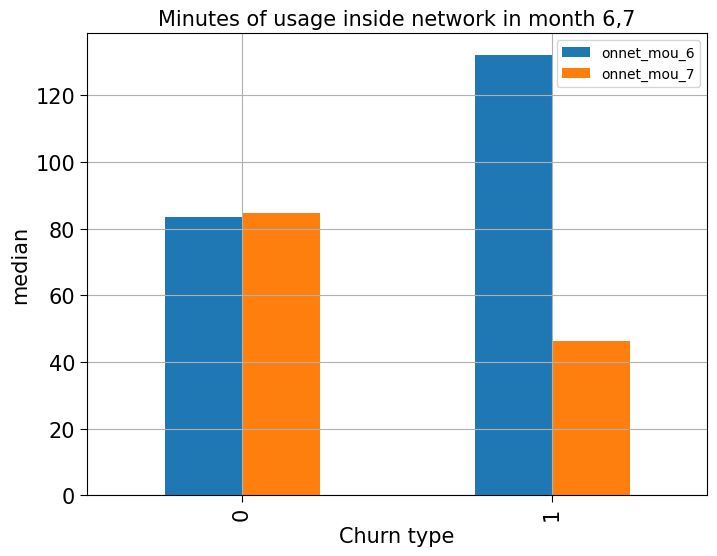

In [151]:
## Plot to visualize onnet_mou
df_highvalue.groupby("churn")[["onnet_mou_6","onnet_mou_7" ]].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15)
plt.title("Minutes of usage inside network in month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Users whose minutes of usage are more in month 6, they are more likely to churn.

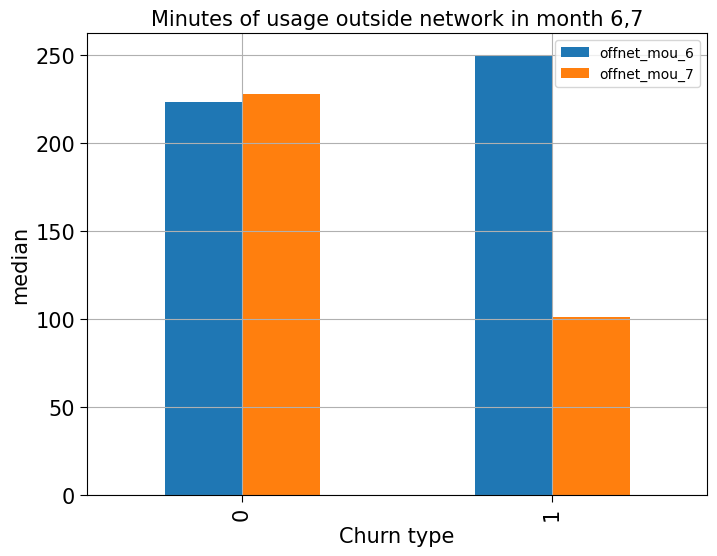

In [152]:
# Plot to visualize  offnet_mou
df_highvalue.groupby("churn")[["offnet_mou_6","offnet_mou_7" ]].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15)
plt.title("Minutes of usage outside network in month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- The users who have big difference of minutes of call duration to other network in month 6 are likely to churn.

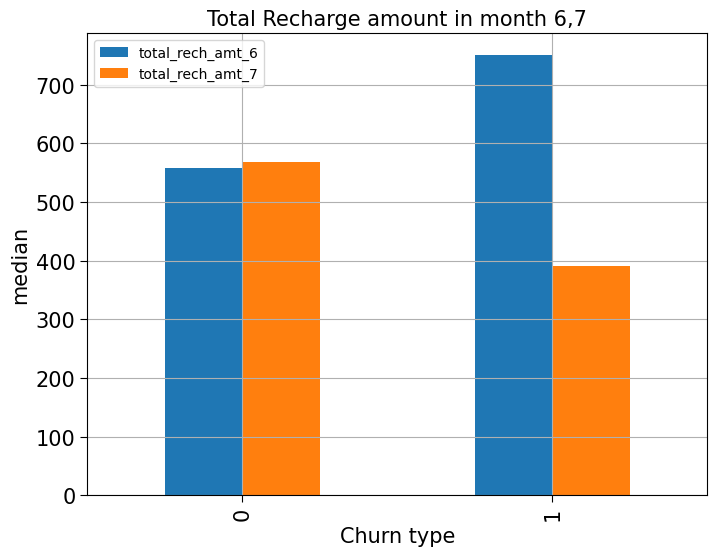

In [153]:
# Plot to visualize total_rech_amt
df_highvalue.groupby("churn")[["total_rech_amt_6","total_rech_amt_7"]].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15)
plt.title("Total Recharge amount in month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- when the total recharge amount is more, those users are more likely to churn.

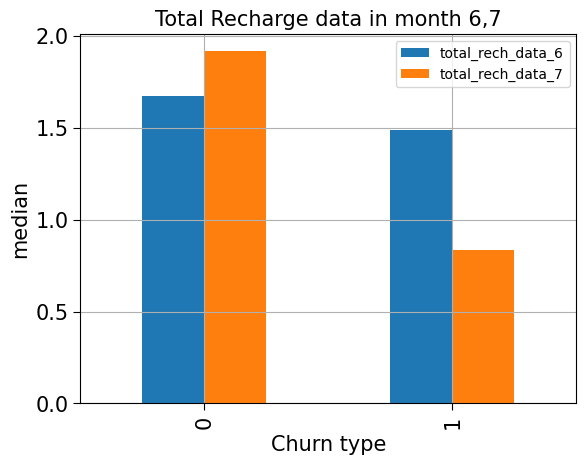

In [154]:
# Plot to visualize total_rech_data_
df_highvalue.groupby("churn")[["total_rech_data_6","total_rech_data_7"]].mean().plot.bar()
plt.tick_params(size=5,labelsize = 15)
plt.title("Total Recharge data in month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

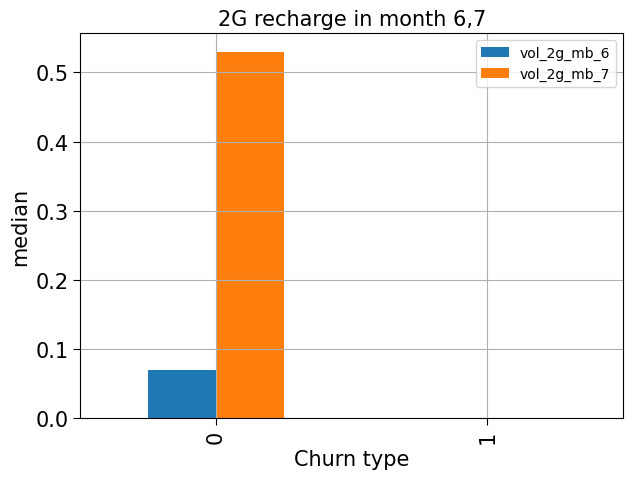

In [155]:
## Plot to visualize vol_2g_mb_6
df_highvalue.groupby("churn")[["vol_2g_mb_6","vol_2g_mb_7"]].median().plot.bar(figsize=[7,5])
plt.tick_params(size=5,labelsize = 15)
plt.title("2G recharge in month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

In [156]:
#Check the percenatges of churn in each category of Night Pack Users in month 7
pd.crosstab(df_highvalue.churn, df_highvalue.night_pck_user_7, normalize='columns')*100

night_pck_user_7,-1.0,0.0,1.0
churn,,,
0,91.32395,97.200515,98.175182
1,8.67605,2.799485,1.824818


In [157]:
#Check the percenatges of churn in each category of Facebook Users in month 7
(pd.crosstab(df_highvalue.churn, df_highvalue.fb_user_7, normalize='columns')*100)

fb_user_7,-1.0,0.0,1.0
churn,,,
0,91.32395,93.537788,97.528621
1,8.67605,6.462212,2.471379


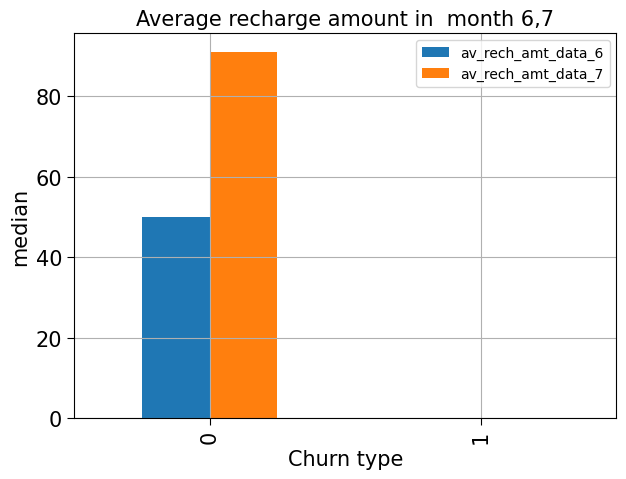

In [158]:
# plot to visualize av_rech_amt_data
df_highvalue.groupby("churn")[["av_rech_amt_data_6","av_rech_amt_data_7"]].median().plot.\
bar(figsize=[7,5])

plt.tick_params(size=5,labelsize = 15)
plt.title("Average recharge amount in  month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

Average recharge amount in month 6,7 is none, from dataset, they are more likely to churn

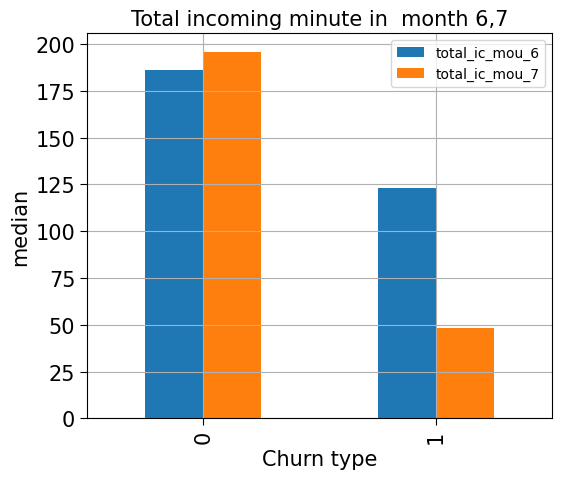

In [159]:
#Plot to visualize total_ic_mou
df_highvalue.groupby("churn")[["total_ic_mou_6","total_ic_mou_7"]].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15)
plt.title("Total incoming minute in  month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

Users who have more difference in Total incoming minutes are more likely to churn

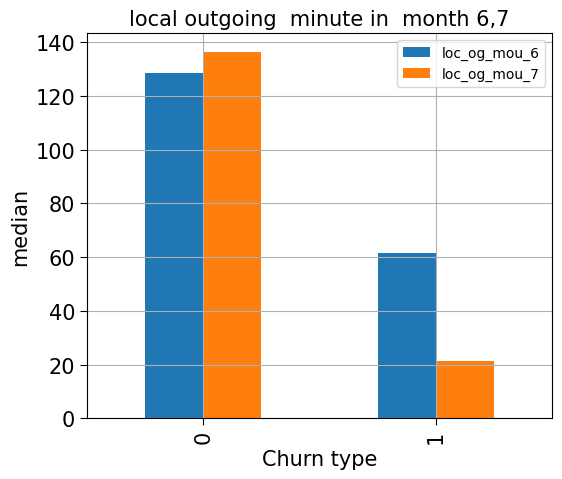

In [160]:
#plot to visualize loc_og_mou
df_highvalue.groupby("churn")[["loc_og_mou_6","loc_og_mou_7"]].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15)
plt.title("local outgoing  minute in  month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

local outgoing minute are less, users are more likely to churn

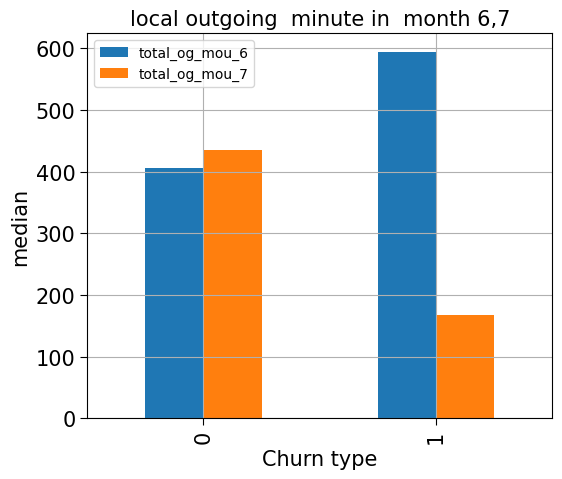

In [161]:
# total_og_mou_6
df_highvalue.groupby("churn")[["total_og_mou_6","total_og_mou_7"]].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15)
plt.title("local outgoing  minute in  month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

Total outgoing minute usage difference is more users are mor likely to chrun

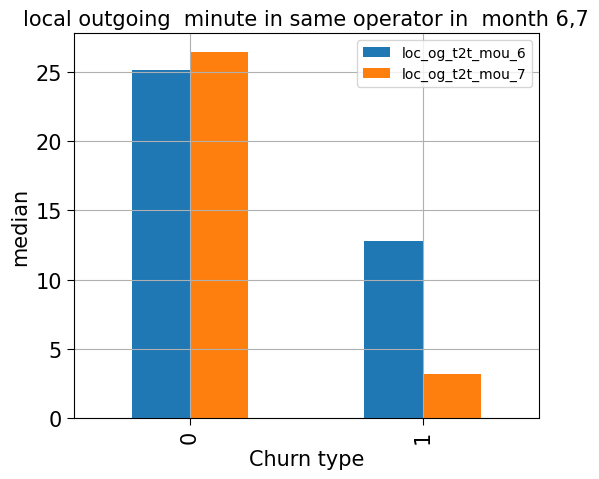

In [162]:
# loc_og_t2t_mou_6
df_highvalue.groupby("churn")[["loc_og_t2t_mou_6","loc_og_t2t_mou_7"]].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15)
plt.title("local outgoing  minute in same operator in  month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

Local outgoing minute in same operator are less, users are more likely to churn.

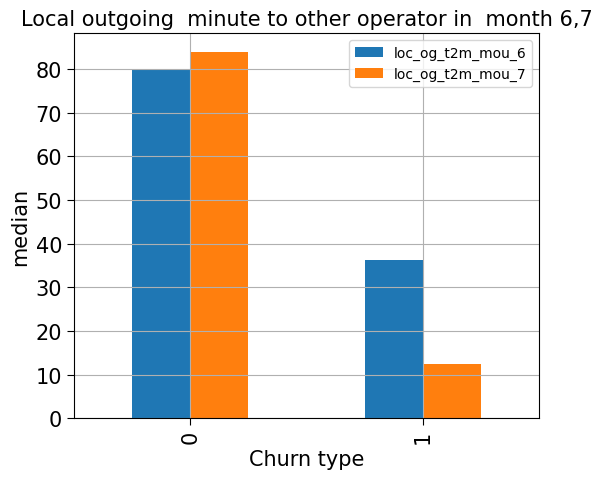

In [163]:
df_highvalue.groupby("churn")[["loc_og_t2m_mou_6","loc_og_t2m_mou_7"]].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15)
plt.title("Local outgoing  minute to other operator in  month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

Local outgoing minute to other operator is less, more likely to churn

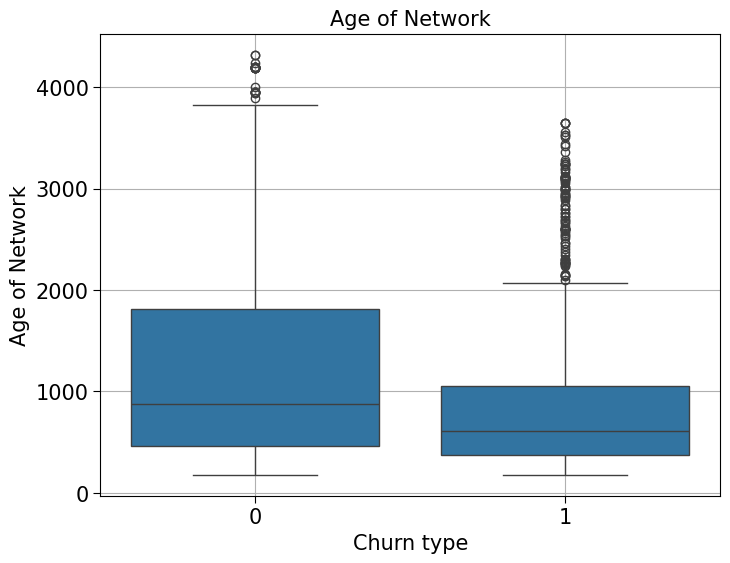

In [164]:
plt.figure(figsize=[8,6])
sns.boxplot(data=df_highvalue,x="churn",y="aon")
plt.tick_params(size=5,labelsize = 15)
plt.title("Age of Network",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.ylabel("Age of Network",fontsize=15)
plt.grid(0.3)
plt.show()

Median Age of network less,more likely to chur

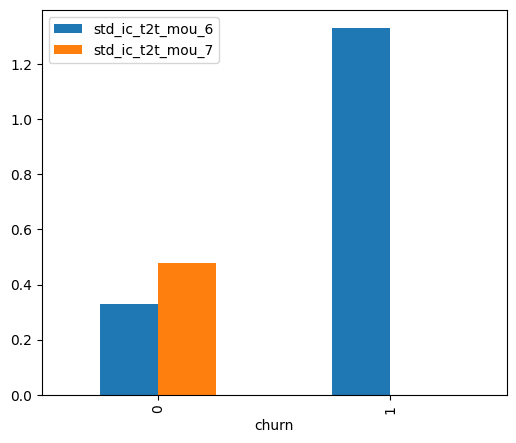

In [165]:
df_highvalue.groupby("churn")[["std_ic_t2t_mou_6","std_ic_t2t_mou_7"]].median().plot.bar(figsize=[6,5])
plt.show()

Users who are using more STD calls are more likely to churn

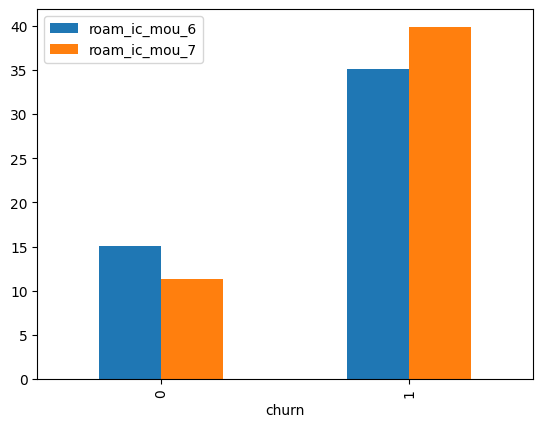

In [166]:
df_highvalue.groupby("churn")[["roam_ic_mou_6","roam_ic_mou_7"]].mean().plot.bar()
plt.show()

If roaming in incoming minutes are more, they are likely to churn more.

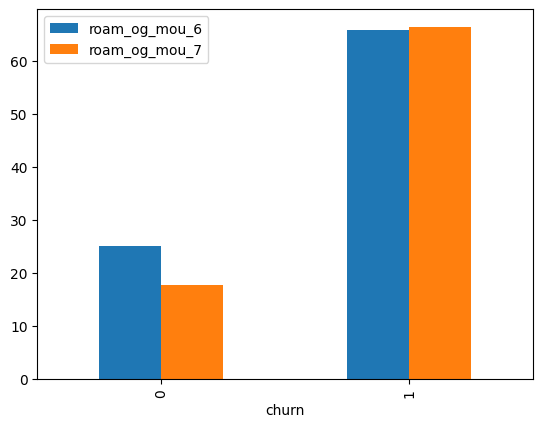

In [167]:
df_highvalue.groupby("churn")[["roam_og_mou_6","roam_og_mou_7"]].mean().plot.bar()
plt.show()

If roaming in outgoing minutes more, Users are more likely to churn.

In [168]:
df_highvalue.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn
4,4,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,...,0,1,1.0,1.0,647,0.0,0.00,0.00,0,0
15,15,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,...,0,0,1.0,-1.0,602,0.0,0.00,0.00,0,0
23,23,1130.948,905.506,859.53,372.71,293.46,450.11,0.00,0.0,0.00,...,0,0,-1.0,-1.0,455,0.0,0.00,0.00,0,0
24,24,371.974,352.069,93.18,38.29,531.19,507.76,0.00,0.0,0.00,...,0,0,0.0,0.0,1219,0.0,0.00,0.00,0,0
27,27,390.489,350.985,8.58,11.48,133.16,158.73,0.00,0.0,0.00,...,0,1,1.0,1.0,573,700.4,185.71,173.72,0,0


### Model Building:


In [172]:
#Load required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [174]:
#Peform the train test split
train,test = train_test_split(df_highvalue,test_size=0.2,random_state=48)

## Logistic Regression

In [175]:
# check the training and testing data shape
print(f"train data shape:{train.shape}")
print(f"Test data shape:{test.shape}")

train data shape:(16810, 97)
Test data shape:(4203, 97)


In [178]:
#Convert categorical data to numeric columns by aggregation.
categorical_columns = ["night_pck_user_6","night_pck_user_7","fb_user_6","fb_user_7"]

In [179]:
train[categorical_columns].head()

,night_pck_user_6,night_pck_user_7,fb_user_6,fb_user_7
7843,0.0,0.0,1.0,1.0
61275,-1.0,0.0,-1.0,1.0
45874,0.0,0.0,1.0,1.0
40810,0.0,-1.0,0.0,-1.0
1033,-1.0,-1.0,-1.0,-1.0


In [180]:
#Calculate categorical features mean and replace those with categorical value
print(train.groupby('night_pck_user_6')["churn"].mean())
print(train.groupby('night_pck_user_7')["churn"].mean())
print(train.groupby('fb_user_6')["churn"].mean())
print(train.groupby('fb_user_7')["churn"].mean())


night_pck_user_6
-1.0    0.069016
 0.0    0.041498
 1.0    0.055814
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.087345
 0.0    0.028645
 1.0    0.018265
Name: churn, dtype: float64
fb_user_6
-1.0    0.069016
 0.0    0.064993
 1.0    0.040018
Name: churn, dtype: float64
fb_user_7
-1.0    0.087345
 0.0    0.065753
 1.0    0.025312
Name: churn, dtype: float64


In [181]:
#Map each categorical value with mean value
mapping = {'night_pck_user_6' : {-1: 0.099621, 0: 0.066717, 1: 0.098462},
           'night_pck_user_7' : {-1: 0.116741, 0: 0.054784, 1: 0.058020},
           'fb_user_6'        : {-1: 0.099621, 0: 0.083333, 1: 0.066233},
           'fb_user_7'        : {-1: 0.116741, 0: 0.065279, 1: 0.053977},
}

#convert categorical to Numeric features by aggregation and replace in train data
train.replace(mapping, inplace = True)
#replace the same in test data
test.replace(mapping, inplace = True)

In [182]:
# segregate  X_train and y_train
y_train = train.pop("churn")
X_train = train

In [183]:
# Segregate X_test and y_test
y_test = test.pop("churn")
X_test = test

## Perform Oversampling with SMOTE

- As we have imbalance data set, we will oversample only the training set data

In [184]:
# !pip install imblearn

In [185]:
# Perform oversampling with traing data and pass both X_train and y_train to SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=48)
X_train_resample,y_train_resample = smote.fit_resample(X_train,y_train)

In [186]:
# Check the shape after Oversampling
print(f"Shape of train data after oversampling: {X_train_resample.shape}")
print(f"Value count of training target variable:\n{y_train_resample.value_counts()}")

Shape of train data after oversampling: (31808, 96)
Value count of training target variable:
churn
0    15904
1    15904
Name: count, dtype: int64


- Now the non-churn and churn data is balanced

## Scaling
- We need to perform the scaling to feed the scaled data to PCA
- We are using minmax scaling

In [187]:
# Import library and perform scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scale = MinMaxScaler()
temp_x_train = scale.fit_transform(X_train_resample)

#Form the dataframe after scaling
X_train_scale = pd.DataFrame(temp_x_train,columns=X_train.columns)
# Check the shape of scaled data
X_train_scale.shape

(31808, 96)

In [188]:
# check the scaled train data head
X_train_scale.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.111997,0.082202,0.037565,0.000042,0.000093,0.005536,0.000153,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.129500,0.000000,0.029028,0.055376,0.0
1,0.875388,0.087922,0.046804,0.077451,0.084084,0.007634,0.001378,0.0,0.0,0.0,...,0.0,0.0,0.090909,1.00000,0.0,0.420391,0.009336,0.016423,0.000065,0.0
2,0.655351,0.079167,0.037708,0.000156,0.000000,0.000967,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.073931,0.000000,0.000000,0.000000,0.0
3,0.583001,0.090152,0.043996,0.039443,0.040043,0.047001,0.058913,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.51216,1.0,0.561005,0.000000,0.000000,0.000000,0.0
4,0.014701,0.090034,0.047820,0.010945,0.017353,0.040699,0.082686,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.00000,1.0,0.069099,0.000000,0.000000,0.000000,0.0


In [189]:
# Perform the scaling on test set
temp_x_test = scale.transform(X_test)
# form the test set dataframe after scaling
X_test_scale = pd.DataFrame(temp_x_test,columns=X_test.columns)

In [190]:
# check the scaled test data head
X_test_scale.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.224251,0.096566,0.043739,0.003743,0.004080,0.043003,0.018166,0.000000,0.000000,0.000000,...,0.0000,0.034483,0.0,0.0,0.0,0.208263,0.080080,0.011287,0.051766,0.0
1,0.588359,0.107285,0.036062,0.239885,0.000000,0.031936,0.000292,0.028539,0.003574,0.090972,...,0.0000,0.000000,0.0,1.0,1.0,0.370621,0.000000,0.000000,0.000000,0.0
2,0.199834,0.096456,0.053502,0.039680,0.026810,0.085668,0.130974,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.0,1.0,1.0,0.715149,0.000000,0.000000,0.000000,1.0
3,0.731273,0.102474,0.068500,0.003906,0.004384,0.099572,0.309202,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.0,0.0,0.0,0.050495,0.022636,0.054350,0.026120,0.0
4,0.510222,0.107686,0.059356,0.038921,0.035063,0.078576,0.069809,0.000000,0.000000,0.000000,...,0.0625,0.103448,0.0,0.0,0.0,0.026576,0.003031,0.000000,0.000000,0.0


- Use X_train_scale and X_test_scale in PCA

## PCA
- we have almost 96 features to train the model
to remove collinearity and faster training we can perform dimensionality reduction technique PCA.

In [191]:
# Load the library
from sklearn.decomposition import PCA
pc_class = PCA(random_state=60)
X_train_pca = pc_class.fit(X_train_scale)

In [192]:
# Check the explained_variance_ratio_ whihc tells us individual principal component variance.
X_train_pca.explained_variance_ratio_

array([5.21246120e-01, 1.69173648e-01, 1.17760432e-01, 5.94131190e-02,
       3.03598355e-02, 1.84833666e-02, 9.56254305e-03, 8.73040719e-03,
       7.50060235e-03, 7.06685996e-03, 6.13199475e-03, 5.29389197e-03,
       3.36688617e-03, 2.94807988e-03, 2.67072777e-03, 2.36032310e-03,
       1.96290263e-03, 1.81122571e-03, 1.58926073e-03, 1.54150581e-03,
       1.43617081e-03, 1.30637866e-03, 1.27063259e-03, 1.20644198e-03,
       1.07100810e-03, 9.69180448e-04, 9.09938098e-04, 8.22977770e-04,
       7.71501111e-04, 7.58593514e-04, 7.23915113e-04, 6.82721638e-04,
       5.73006660e-04, 5.66936937e-04, 4.94655030e-04, 4.69078975e-04,
       4.51143761e-04, 4.20627003e-04, 4.15972017e-04, 3.96958493e-04,
       3.85388862e-04, 3.78673008e-04, 3.70495537e-04, 3.30014105e-04,
       2.97204959e-04, 2.73491473e-04, 2.51373129e-04, 2.33766483e-04,
       2.24839359e-04, 2.11546002e-04, 1.96524876e-04, 1.93765768e-04,
       1.76668792e-04, 1.72580910e-04, 1.69943829e-04, 1.52300731e-04,
      

In [193]:
# perform the cumulaltive sum of explained variance
var_cumu = np.cumsum(X_train_pca.explained_variance_ratio_)
#Convert explained variance to DataFrame
var_cumu_df = pd.DataFrame({"variance":var_cumu})
var_cumu_df.head(30)

,variance
0,0.521246
1,0.690420
2,0.808180
3,0.867593
4,0.897953
5,0.916437
6,0.925999
7,0.934729
8,0.942230
9,0.949297


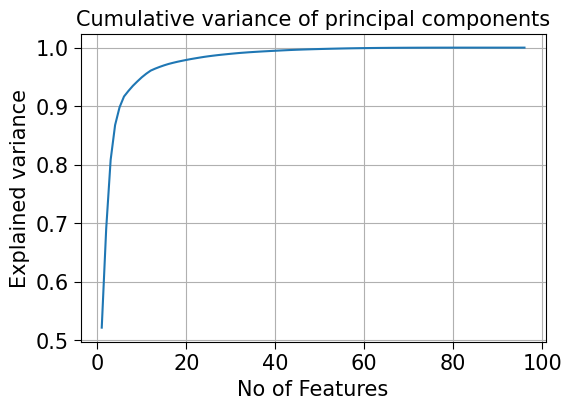

In [194]:
# Plot the cumulative explained variance : SCREE Plot
plt.figure(figsize=[6,4])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.title("Cumulative variance of principal components",size=15)
plt.ylabel("Explained variance",size=15)
plt.xlabel("No of Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

In [195]:
# By providing variance value we can also get the suitable principal components.
pca_demo = PCA(0.96,random_state=40)
X_train_pca1 = pca_demo.fit_transform(X_train_scale)
print(f"suitable principal components for 96% of variance:{X_train_pca1.shape[1]}")

suitable principal components for 96% of variance:12


In [196]:
# Instantiate PCA with 12 components
pca_object = PCA(n_components=12,random_state=48)
# get the PCs for train data
X_train_pca_final = pca_object.fit_transform(X_train_scale)
# get the PCs for test data
X_test_pca_final = pca_object.fit_transform(X_test_scale)

#check the shape of train and test data after PCA
print(X_train_pca_final.shape)
print(X_test_pca_final.shape)

(31808, 12)
(4203, 12)


In [197]:
# Check the correlations after PCA
np.corrcoef(X_train_pca_final.transpose())

array([[ 1.00000000e+00,  6.38046196e-18,  3.53761334e-18,
        -1.40478083e-17, -3.87296202e-18, -3.52446432e-17,
         5.69598769e-18, -2.86599321e-17,  2.44064629e-17,
        -1.41224346e-17, -5.31653888e-17, -3.96513250e-17],
       [ 6.38046196e-18,  1.00000000e+00,  3.79006332e-16,
        -3.25006540e-17,  1.55029293e-17,  2.76596649e-18,
        -3.15329503e-17, -2.91781808e-18, -7.16429387e-18,
        -1.34197829e-18, -3.88174715e-18,  2.29991966e-17],
       [ 3.53761334e-18,  3.79006332e-16,  1.00000000e+00,
         1.74548356e-17,  6.89799919e-19, -3.21853514e-18,
        -3.28399347e-18,  4.01981087e-18, -1.06686623e-17,
        -1.43421639e-17,  1.26626936e-17,  2.99926060e-17],
       [-1.40478083e-17, -3.25006540e-17,  1.74548356e-17,
         1.00000000e+00,  4.43082437e-18,  2.95600008e-18,
        -1.89261699e-18,  2.40521038e-18,  1.22924325e-17,
         7.50112767e-18,  8.30588285e-18, -7.84910873e-18],
       [-3.87296202e-18,  1.55029293e-17,  6.8979991

##Model Building:
We will explore below models.
- Logistic regression
- Decision tree
- Randomforest
- Gradientboosting
- XGboost

In [198]:
#Function definition to check the performance of model on test data
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
# Check the performance on test set
#Precision
#recall
#f1_score
#ROC_AUC
def calculate_peformance_testdata(model_name,y_test,y_pred,pred_prob):

    '''y_test:Test Labels,
       y_pred: Prediction Labels ,
       pred_prob:Predicted Probability  '''

    print(f"{model_name}:")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"f1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"roc_auc: {roc_auc}")
#     return a DataFrame with all the score
    return pd.DataFrame({"Model":[model_name],"precision":[precision],"recall":[recall],"f1_score":[f1_score],
                         "roc_auc":[roc_auc]})

In [199]:
# Create a DataFrame which stores all test score for each model
score_df = pd.DataFrame({"Model":[None],"precision":[None],"recall":[None],"f1_score":[None],"roc_auc":[None]})

## Logistic regression

In [200]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Instantiate logistic regression
lr_obj = LogisticRegression(random_state=40)
#pass PCA data as input
lr_obj.fit(X_train_pca_final, y_train_resample)
cv_score = cross_val_score(lr_obj, X_train_pca_final, y_train_resample, cv=5, scoring='f1_micro')
print(f"Cross validation score: {cv_score}")

Cross validation score: [0.84627476 0.83338573 0.84203081 0.84750825 0.8346172 ]


In [201]:
#Prediction on  pca testdata
y_pred_lr = lr_obj.predict(X_test_pca_final)
#check predict probability on pca data
pred_prob = lr_obj.predict_proba(X_test_pca_final)

In [202]:
#check various scores on test data
df1 = calculate_peformance_testdata("LogisticRegression",y_test,y_pred_lr,pred_prob[:,1])

LogisticRegression:
precision: 0.052935943060498224
recall: 0.5560747663551402
f1_score: 0.0966693744922827
roc_auc: 0.5601701407843532


In [206]:
#Add the score to dataframe for comparision with other model performance
score_df= score_df.dropna()
score_df = pd.concat([score_df.dropna(), df1])
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.052936,0.556075,0.096669,0.56017


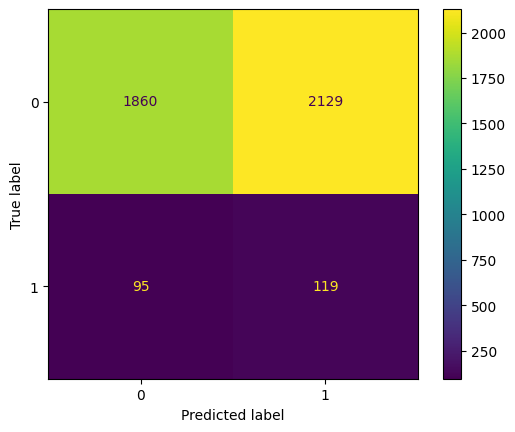

In [209]:
#Plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, lr_obj.predict(X_test_pca_final))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## DecisionTree
X_train_resample,y_train_resample

In [215]:
from sklearn.tree import DecisionTreeClassifier
#Instantiate Decision tree with defautl parameter
dt_obj=  DecisionTreeClassifier(random_state=40)

# here we have used data generated by SMOTE.
dt_obj.fit(X_train_scale, y_train_resample)
cv_score = cross_val_score(dt_obj, X_train_scale, y_train_resample, cv=5, scoring='f1_micro')
print(cv_score)

[0.92549513 0.95268783 0.94875825 0.94937903 0.94639208]


In [216]:
#check the default paramters
dt_obj.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

In [217]:
#Perform hyperparamter tuning with randomizedsearchcv
param_grid = dict({"max_leaf_nodes":[4,5,6],"min_samples_leaf":[3,4,5],'min_samples_split':[3,4,5]})
dt_clf = DecisionTreeClassifier(random_state=40)
dt_clf_rcv = RandomizedSearchCV(dt_clf,param_grid,cv=5,scoring="f1_micro")# n_jobs=-1
dt_clf_rcv.fit(X_train_scale, y_train_resample)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
                   param_distributions={'max_leaf_nodes': [4, 5, 6],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 4, 5]},
                   scoring='f1_micro')

In [218]:
#check the beat score and best estimator paramters
print(dt_clf_rcv.best_score_)
print(dt_clf_rcv.best_estimator_)

0.894146026302512
DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=3,
                       min_samples_split=5, random_state=40)


In [219]:
#Train the decision tree with best paramters obtained from above step
# Commented out the hyperparamter tuning as it takes sometime to execute
dt_clf = DecisionTreeClassifier(max_leaf_nodes=6,min_samples_leaf=4,min_samples_split=5,random_state=40)
dt_clf.fit(X_train_scale,y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=5, random_state=40)

In [220]:
#perform the prediction
y_pred_dt = dt_clf.predict(X_test_scale)
#Perform the prediction probability
pred_prob = dt_clf.predict_proba(X_test_scale)

In [221]:
##check the scores.
df2 = calculate_peformance_testdata("DecisionTree",y_test,y_pred_dt,pred_prob[:,1])

DecisionTree:
precision: 0.26412614980289095
recall: 0.9392523364485982
f1_score: 0.4123076923076923
roc_auc: 0.9231256281877969


In [223]:
#Add the score to Dataframe  for comparision
score_df = pd.concat([score_df, df2], ignore_index=True)
score_df.dropna(inplace=True)
score_df.drop_duplicates(inplace=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.052936,0.556075,0.096669,0.560170
1,DecisionTree,0.264126,0.939252,0.412308,0.923126


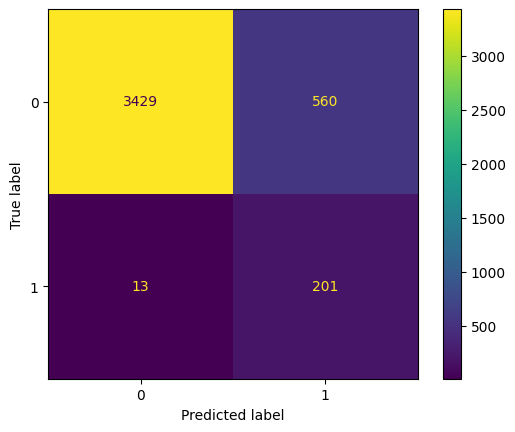

In [230]:
#visualize the confusion matrix
cm = confusion_matrix(y_test, dt_clf.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Randomforest

In [232]:
#Instantiate RandomForest, train with default parameters
rf_class = RandomForestClassifier(n_jobs=-1) #class_weight={0:1,1:2}
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [233]:
#check the default parameters
rf_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [234]:
#Use best paramters to train the model
rf_class = RandomForestClassifier(min_samples_leaf=3,n_estimators=120,n_jobs=-1,random_state=40)
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [235]:
#check the scores
df3 = calculate_peformance_testdata("RandomForest",y_test,y_pred_rf,pred_prob[:,1])

RandomForest:
precision: 0.5168918918918919
recall: 0.7149532710280374
f1_score: 0.6
roc_auc: 0.9604789338906291


In [237]:
#Add score to the dataframe for comparision
score_df = pd.concat([score_df, df3], ignore_index=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.052936,0.556075,0.096669,0.560170
1,DecisionTree,0.264126,0.939252,0.412308,0.923126
2,RandomForest,0.516892,0.714953,0.600000,0.960479


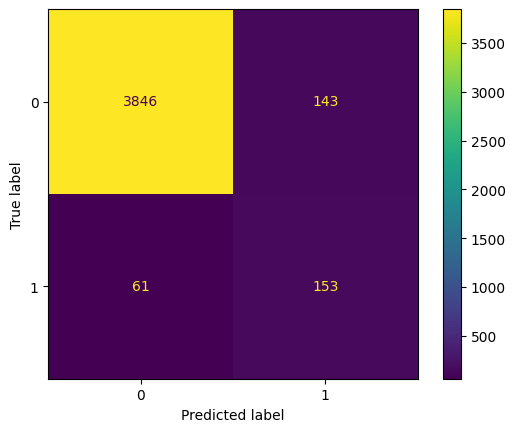

In [238]:
#visualize confusion matrix
cm = confusion_matrix(y_test, rf_class.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Gradient Boosting

In [240]:
#Train gradient boosting with default parameters
from sklearn.ensemble import GradientBoostingClassifier
gb_class = GradientBoostingClassifier(random_state=42,min_samples_leaf=4,min_samples_split=5)
# n_estimators=110,min_samples_leaf=2,min_samples_split=3,learning_rate=0.2
gb_class.fit(X_train_scale,y_train_resample)

#get the predicated label
y_pred_gb = gb_class.predict(X_test_scale)
#get the predicted probability
pred_prob = gb_class.predict_proba(X_test_scale)

In [241]:
#check the training default parameters
gb_class.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [242]:
#Check the test scores
df4 = calculate_peformance_testdata("GradientBoosting",y_test,y_pred_gb,pred_prob[:,1])

GradientBoosting:
precision: 0.4613333333333333
recall: 0.8084112149532711
f1_score: 0.5874363327674024
roc_auc: 0.9630807149567853


In [244]:
#Add the scores to dataframe
score_df=pd.concat([score_df, df4])
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.052936,0.556075,0.096669,0.560170
1,DecisionTree,0.264126,0.939252,0.412308,0.923126
2,RandomForest,0.516892,0.714953,0.600000,0.960479
0,GradientBoosting,0.461333,0.808411,0.587436,0.963081


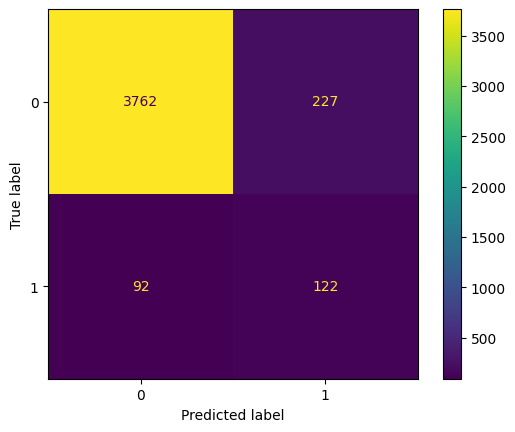

In [245]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, gb_class.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Xgboost

In [246]:
# !pip install xgboost

In [247]:
import xgboost as xgb

In [248]:
# Model training with default paamters

xgb_class = xgb.XGBClassifier(max_depth=10)
xgb_class.fit(X_train_scale,y_train_resample)

#Model prediction
y_pred_xgb = xgb_class.predict(X_test_scale)
#Model predict probability
pred_prob = xgb_class.predict_proba(X_test_scale)

In [249]:
#check the model default paramters
xgb_class.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [250]:
#chekc the scores
df5 = calculate_peformance_testdata("XGBoost",y_test,y_pred_xgb,pred_prob[:,1])

XGBoost:
precision: 0.6116071428571429
recall: 0.6401869158878505
f1_score: 0.6255707762557078
roc_auc: 0.9655091220482496


In [252]:
#add the score to dataframe
score_df= pd.concat([score_df, df5], ignore_index=True)
score_df.drop_duplicates()

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.052936,0.556075,0.096669,0.560170
1,DecisionTree,0.264126,0.939252,0.412308,0.923126
2,RandomForest,0.516892,0.714953,0.600000,0.960479
3,GradientBoosting,0.461333,0.808411,0.587436,0.963081
4,XGBoost,0.611607,0.640187,0.625571,0.965509


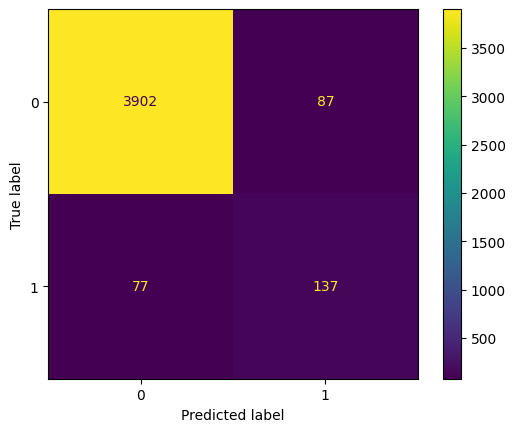

In [253]:
#Plot confusion matrix
cm = confusion_matrix(y_test, xgb_class.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [254]:
#check how various model is performing on test set on Churn=1.
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.052936,0.556075,0.096669,0.560170
1,DecisionTree,0.264126,0.939252,0.412308,0.923126
2,RandomForest,0.516892,0.714953,0.600000,0.960479
3,GradientBoosting,0.461333,0.808411,0.587436,0.963081
4,XGBoost,0.611607,0.640187,0.625571,0.965509


## Feature Importance and Model Interpretation

In [255]:
# Randomforest model training
gb_object = RandomForestClassifier(random_state=40)
gb_object.fit(X_train_resample,y_train_resample)
y_pred = gb_object.predict(X_test)

In [256]:
#check the performance on test data
calculate_peformance_testdata("RandomForest",y_test,y_pred,pred_prob[:,1])

RandomForest:
precision: 0.5547169811320755
recall: 0.6869158878504673
f1_score: 0.6137787056367432
roc_auc: 0.9655091220482496


,Model,precision,recall,f1_score,roc_auc
0,RandomForest,0.554717,0.686916,0.613779,0.965509


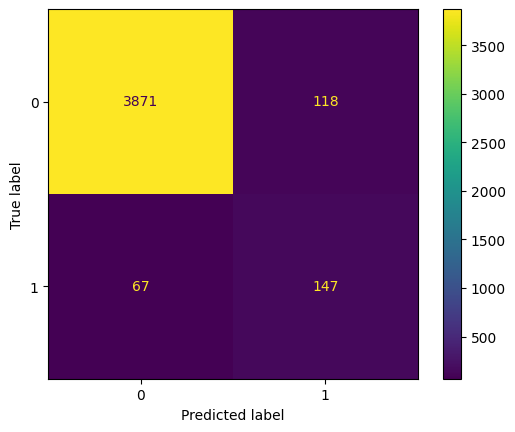

In [257]:
#plot confusion matrix
cm = confusion_matrix(y_test, gb_object.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [258]:
#check the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3989
           1       0.55      0.69      0.61       214

    accuracy                           0.96      4203
   macro avg       0.77      0.83      0.80      4203
weighted avg       0.96      0.96      0.96      4203



In [259]:
#Create a Feature importance dataframe
Feature_importance = pd.DataFrame({"columns":X_train.columns,"feature_importance":gb_object.feature_importances_})

In [260]:
#check 40 important features
fi = Feature_importance.sort_values(by="feature_importance",ascending=False).head(40)
fi

,columns,feature_importance
95,churn_probability,0.121715
10,roam_og_mou_7,0.115194
8,roam_ic_mou_7,0.088261
80,night_pck_user_7,0.042941
90,fb_user_7,0.041337
92,aug_vbc_3g,0.031693
20,loc_og_mou_7,0.028133
40,loc_ic_t2m_mou_7,0.021864
70,total_rech_data_7,0.021599
54,total_ic_mou_7,0.018248


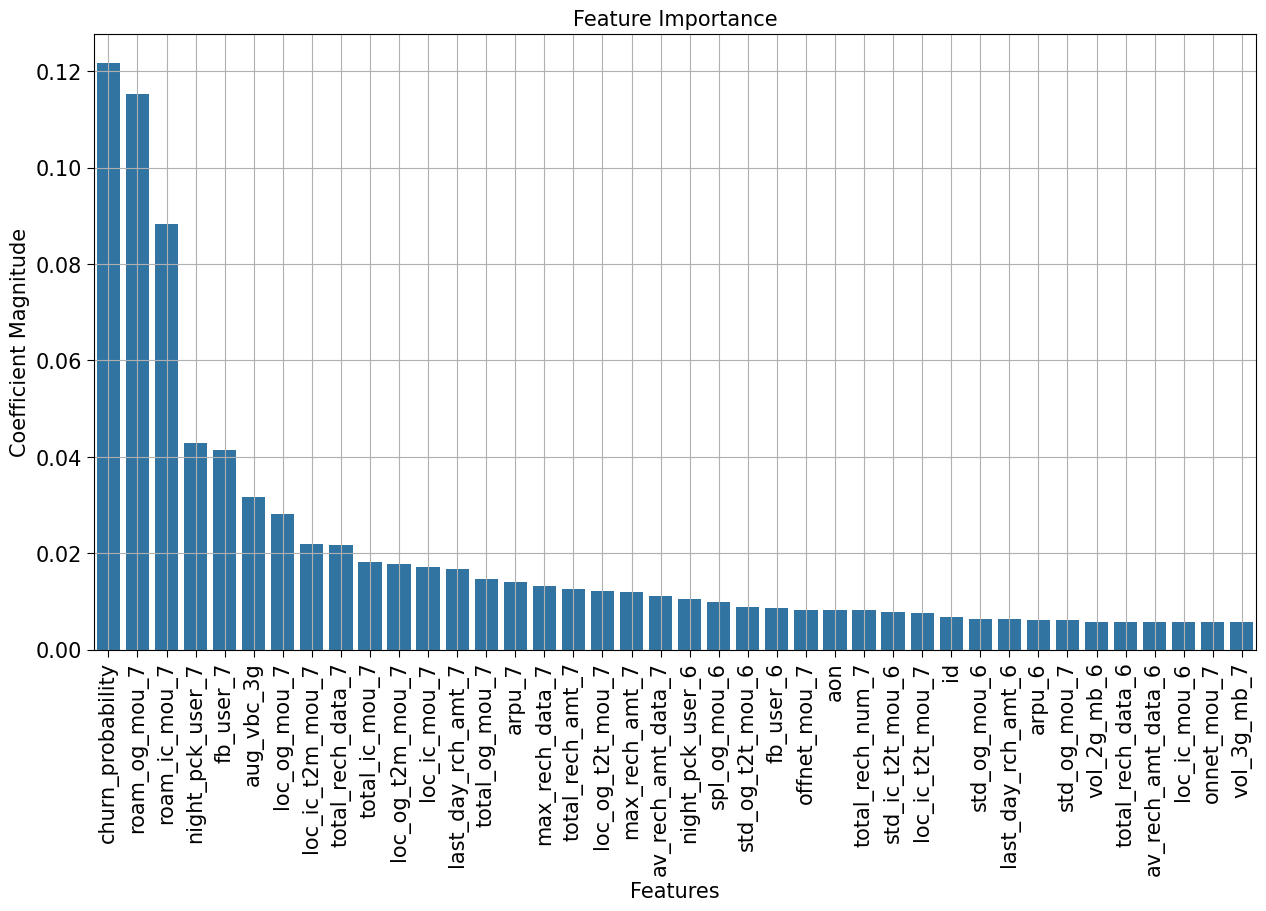

In [262]:
#Plot to show the feature importance
plt.figure(figsize=[15,8])
sns.barplot(x = "columns",y="feature_importance",data=fi)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

## Conclusion:
- The most important features are as shown in above graph.
- Average revenue per user more, those are likely to churn if they are not happy with the network.
- local calls minutes of usage has also has impact on churn .
- Large difference between recharge amount between 6th and 7th month, also impact churn.
- Users who are using more Roaminng in Outgoing and Incoming calls, are likely to churn.Compnay can focus on them too.